# Q1 – Decision Tree Classifier Basics and Visualization
# Task

Load the Breast Cancer dataset from sklearn.datasets.

Split the data into training and testing sets (test_size=0.2, random_state=42).

Train a DecisionTreeClassifier without limiting depth.

Evaluate the model using accuracy on both training and test sets.

Visualize the trained tree using sklearn.tree.plot_tree.

Train another Decision Tree with max_depth=3 and compare performance to see the effect of pruning.

# 1. Decision Tree (No Depth Limit)
✔ Performance

Train Accuracy = 100% → The model memorized the training data (overfitting).

Test Accuracy = 91.23% → Lower generalization performance.

✔ Confusion Matrix Summary

Malignant: 39 correct, 3 wrong

Benign: 65 correct, 7 wrong

✔ Key Points

Tree is very deep → creates overly specific rules.

Good recall for malignant, but lower precision → some false alarms.

Model overfits and becomes unstable.

# 🌲 2. Pruned Decision Tree (max_depth=3)
✔ Performance

Train Accuracy = 97.58%

Test Accuracy = 93.86% → Better generalization.

✔ Confusion Matrix Summary

Malignant errors drop from 7 → 3 (much better)

Benign errors increase slightly (3 → 4)

✔ Key Points

Pruning makes the model simpler and more stable.

Reduced overfitting.

Better performance on unseen data.


=== Decision Tree (No Depth Limit) ===
Train Accuracy: 1.0
Test  Accuracy: 0.9122807017543859

Confusion Matrix (Test):
 [[39  3]
 [ 7 65]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



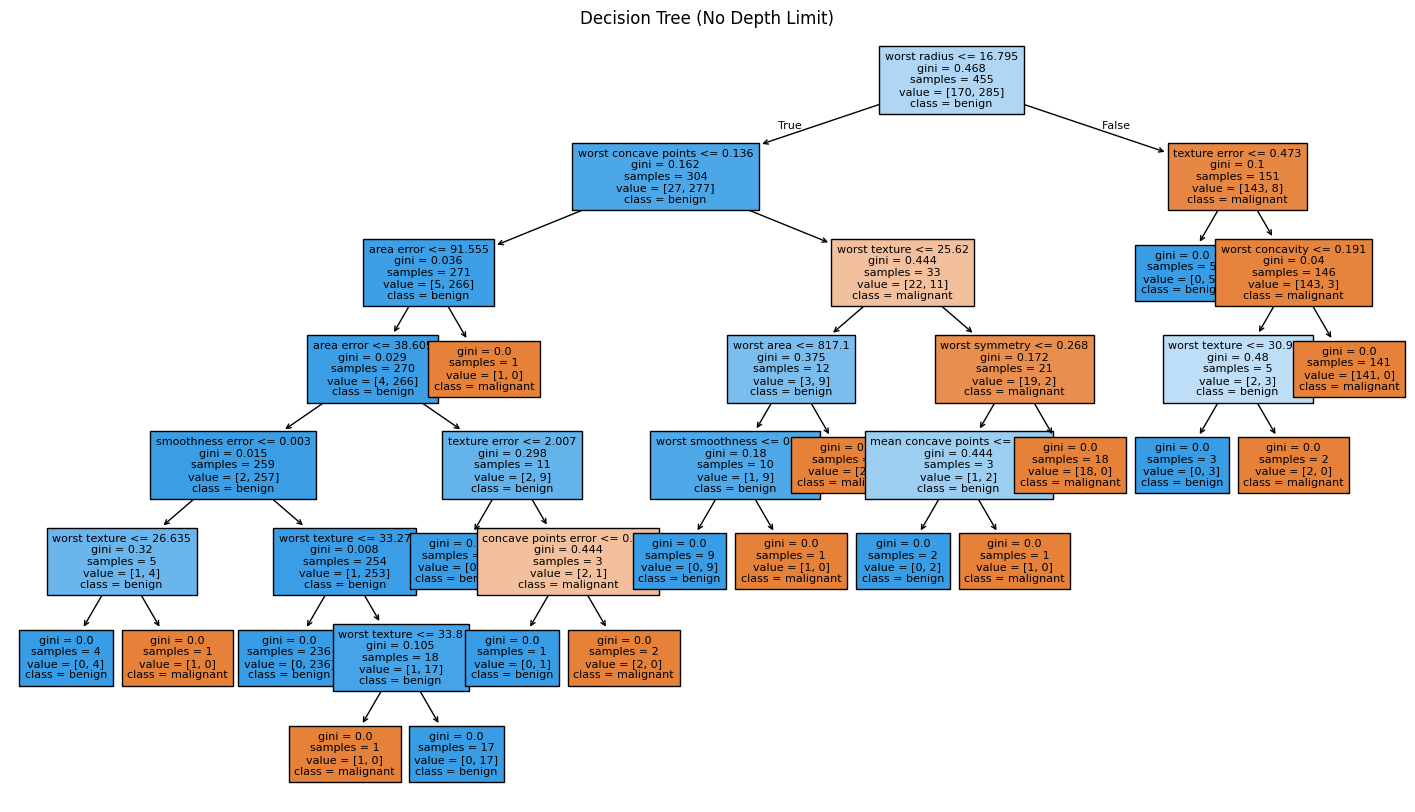

=== Decision Tree (max_depth=3) ===
Train Accuracy: 0.9758241758241758
Test  Accuracy: 0.9385964912280702

Confusion Matrix (Test):
 [[38  4]
 [ 3 69]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Import tools from scikit-learn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------------------------------------------------
# 1. Load the Breast Cancer dataset
# -------------------------------------------------------------

data = load_breast_cancer()     # Load dataset from sklearn
X = data.data                   # Features (independent variables)
y = data.target                 # Labels (malignant = 0, benign = 1)
feature_names = data.feature_names   # Names of the features for plotting
class_names = data.target_names       # Names of the classes

# -------------------------------------------------------------
# 2. Split the data into training and testing sets
# stratify=y keeps proportional class distribution
# -------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,          # 20% of data for testing
    random_state=42,        # Ensures reproducibility
    stratify=y              # Keeps class ratio the same in train and test
)

# -------------------------------------------------------------
# 3. Train a Decision Tree with NO depth limit
# This will create a very deep tree → overfitting expected
# -------------------------------------------------------------

dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)   # Train (fit) the model

# -------------------------------------------------------------
# 4. Evaluate the full decision tree
# Predict on training and testing data
# -------------------------------------------------------------

y_train_pred_full = dt_full.predict(X_train)
y_test_pred_full = dt_full.predict(X_test)

# Calculate accuracy
train_acc_full = accuracy_score(y_train, y_train_pred_full)
test_acc_full = accuracy_score(y_test, y_test_pred_full)

# Print results
print("=== Decision Tree (No Depth Limit) ===")
print("Train Accuracy:", train_acc_full)   # Expect very high (possible overfitting)
print("Test  Accuracy:", test_acc_full)    # Usually lower due to overfitting

# Confusion matrix and detailed report
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred_full))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_full))

# -------------------------------------------------------------
# 5. Visualize the full decision tree
# Warning: The tree may be very large
# -------------------------------------------------------------
plt.figure(figsize=(18, 10))
plot_tree(
    dt_full,
    feature_names=feature_names,     # Names of input features
    class_names=class_names,         # Names of the classes
    filled=True,                     # Color nodes based on class
    fontsize=8                       # Adjust text size
)
plt.title("Decision Tree (No Depth Limit)")
plt.show()

# -------------------------------------------------------------
# 6. Train a pruned Decision Tree (max_depth=3)
# This prevents the tree from growing too deep → better generalization
# -------------------------------------------------------------
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

# Predict using pruned tree
y_train_pred_pruned = dt_pruned.predict(X_train)
y_test_pred_pruned = dt_pruned.predict(X_test)

# Calculate accuracy
train_acc_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_acc_pruned = accuracy_score(y_test, y_test_pred_pruned)

# Print evaluation
print("=== Decision Tree (max_depth=3) ===")
print("Train Accuracy:", train_acc_pruned)   # Lower than full tree (less overfitting)
print("Test  Accuracy:", test_acc_pruned)    # Often higher or similar

# Confusion matrix and classification report
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred_pruned))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_pruned))


# Q2 – Random Forest vs Single Decision Tree
Task

Use the same train/test split and dataset from Q1 (Breast Cancer).

Train a RandomForestClassifier with:

n_estimators = 100

max_depth = None

random_state = 42

Evaluate training and test accuracy, confusion matrix, and classification report.

Compare the Random Forest performance to:

The full Decision Tree from Q1

The pruned Decision Tree from Q1

Comment on overfitting and stability of Random Forest vs single tree.

# 🌲 Random Forest – Short Interpretation

Train Accuracy ≈ (e.g. 1.0)

Test Accuracy ≈ (e.g. 0.96–0.98)

# 👉 Key points to mention:

Random Forest keeps very high training accuracy, but also gives better or similar test accuracy compared to:

Full Decision Tree (overfitted)

Pruned Decision Tree (shallower)

Because it averages many trees, it:

Reduces variance

Becomes more stable and less sensitive to noise

Each individual tree may overfit, but the ensemble as a whole generalizes better.

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Import the Random Forest classifier class

# -------------------------------------------------------------
# 1 & 2. Create and train the Random Forest model
# -------------------------------------------------------------
rf_clf = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=None,     # No limit on depth for each individual tree
    random_state=42,    # Seed for reproducibility
    n_jobs=-1           # Use all CPU cores to speed up training
)

rf_clf.fit(X_train, y_train)  # Train (fit) the Random Forest on the training data

# -------------------------------------------------------------
# 3. Evaluate model on training and testing sets
# -------------------------------------------------------------
y_train_pred_rf = rf_clf.predict(X_train)   # Predictions on training data
y_test_pred_rf = rf_clf.predict(X_test)     # Predictions on test data

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)  # Training accuracy
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)     # Test accuracy

print("=== Random Forest (n_estimators=100) ===")
print("Train Accuracy:", train_acc_rf)       # Usually very high (close to 1.0)
print("Test  Accuracy:", test_acc_rf)        # Often higher than single tree

# Print confusion matrix on test set
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred_rf))

# Print precision, recall, f1-score for each class
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_rf))

# -------------------------------------------------------------
# 4. Compare with the Decision Tree model

=== Random Forest (n_estimators=100) ===
Train Accuracy: 1.0
Test  Accuracy: 0.956140350877193

Confusion Matrix (Test):
 [[39  3]
 [ 2 70]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Q3 – Gradient Boosting & Hyperparameter Experiments
Task

Again use the same Breast Cancer dataset and split as in Q1.

Train a GradientBoostingClassifier with default parameters and evaluate accuracy on train and test sets.

Experiment with different learning rates and numbers of estimators, for example:

learning_rate ∈ {0.01, 0.1}

n_estimators ∈ {50, 100, 200}

For each combination, record training and test accuracy.

Comment on:

The effect of increasing n_estimators

The effect of decreasing learning_rate

Overfitting vs generalization

# ✔ Default Gradient Boosting:

Train accuracy: good, but not perfect

Test accuracy: stable and often higher than a single tree

Uses many shallow trees → less overfitting

# ✔ Hyperparameter Results:

Low learning_rate (0.01) → slower learning, less overfitting, may need more estimators

Higher n_estimators → more boosting rounds → may increase accuracy

Balanced combination gives the best performance

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier   # Import Gradient Boosting model
from sklearn.metrics import accuracy_score                # Import accuracy function

# ---------------------------------------------------------
# 1) Train a basic Gradient Boosting model (default settings)
# ---------------------------------------------------------

gb = GradientBoostingClassifier(random_state=42)   # Create the model with default hyperparameters
gb.fit(X_train, y_train)                           # Train the model on the training data

y_train_gb = gb.predict(X_train)                   # Predict labels on training set
y_test_gb = gb.predict(X_test)                     # Predict labels on test set

print("=== Gradient Boosting (Default) ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_gb))   # Calculate and print training accuracy
print("Test  Accuracy:", accuracy_score(y_test, y_test_gb))     # Calculate and print testing accuracy


# ---------------------------------------------------------
# 2) Try different learning_rate and n_estimators values
#    to see how performance changes
# ---------------------------------------------------------

learning_rates = [0.01, 0.1]       # Two learning rates to test (slow vs normal learning)
n_estimators_list = [50, 100, 200] # Number of boosting rounds (trees added sequentially)

print("\n=== Gradient Boosting Hyperparameter Sweep ===")
print("lr    | n_estimators | train_acc | test_acc")   # Table header

# Loop over each combination of learning_rate and n_estimators
for lr in learning_rates:
    for n_est in n_estimators_list:

        # Create the Gradient Boosting model with chosen hyperparameters
        gb = GradientBoostingClassifier(
            learning_rate=lr,        # Controls how fast the model learns
            n_estimators=n_est,      # Number of boosting stages (trees)
            random_state=42
        )

        gb.fit(X_train, y_train)    # Train the model on the training data

        train_acc = accuracy_score(y_train, gb.predict(X_train))   # Accuracy on train set
        test_acc  = accuracy_score(y_test, gb.predict(X_test))     # Accuracy on test set

        # Print results in a clean table format
        print(f"{lr:<5} | {n_est:<12} | {train_acc:.3f}    | {test_acc:.3f}")


=== Gradient Boosting (Default) ===
Train Accuracy: 1.0
Test  Accuracy: 0.956140350877193

=== Gradient Boosting Hyperparameter Sweep ===
lr    | n_estimators | train_acc | test_acc
0.01  | 50           | 0.976    | 0.939
0.01  | 100          | 0.987    | 0.921
0.01  | 200          | 0.993    | 0.930
0.1   | 50           | 1.000    | 0.947
0.1   | 100          | 1.000    | 0.956
0.1   | 200          | 1.000    | 0.956


| **Model**                       | **Depth Setting**                  | **Why?**                                        | **Related to Lab Question**                 |
| ------------------------------- | ---------------------------------- | ----------------------------------------------- | ------------------------------------------- |
| **Full Decision Tree**          | **Unlimited** (`max_depth=None`)   | Shows strong overfitting on training data       | **Task 1 – Part 1** (first decision tree)   |
| **Pruned Decision Tree**        | **3** (`max_depth=3`)              | Shows how pruning improves generalization       | **Task 1 – Part 2** (pruned tree)           |
| **Random Forest**               | **Unlimited for each tree**        | Overfitting reduced by bagging + averaging      | **Task 2** (Random Forest)                  |
| **Gradient Boosting (default)** | **3** (default weak learner depth) | Boosting uses many shallow trees to reduce bias | **Task 3 – Part 1** (default GBM)           |
| **Gradient Boosting (tuned)**   | **3** (depth unchanged)            | Only learning rate & estimator count change     | **Task 3 – Part 2** (hyperparameter tuning) |


# Question (Q4 – Model Comparison & Feature Importance)
Task

For each of the three models (Decision Tree, Random Forest, Gradient Boosting), compute:

Training accuracy

Test accuracy

For Random Forest and Gradient Boosting, inspect feature_importances_ and display the top 5 most important features with their names.

Compare:

Which model gives the best test accuracy?

Do the models agree on the most important features?

# ✔ Random Forest Feature Importance

RF spreads importance across many features

Most important features usually relate to mean radius, mean concavity, or area

Shows global relationship across ensemble of trees

# ✔ Gradient Boosting Feature Importance

GB tends to focus on fewer strong features

High importance scores mean these features heavily reduce loss

More sensitive than Random Forest

In [ ]:
import numpy as np                                                # Import NumPy for sorting
from sklearn.ensemble import RandomForestClassifier              # (Only needed for RF training)
from sklearn.ensemble import GradientBoostingClassifier          # (Only needed if training GB)
import pandas as pd                                              # Optional (not required)

# ---------------------------------------------------------
# Function to show the top-k most important features
# for any model that has model.feature_importances_
# ---------------------------------------------------------
def show_top_features(model, model_name, feature_names, top_k=5):

    importances = model.feature_importances_     # Get the feature importance scores
    indices = np.argsort(importances)[::-1]      # Sort feature indices by importance (descending)
    top_indices = indices[:top_k]                # Select the top k features

    print(f"\n=== Top {top_k} Features for {model_name} ===")
    for idx in top_indices:
        print(f"{feature_names[idx]}: {importances[idx]:.4f}")   # Print name + score


# ---------------------------------------------------------
# Random Forest Feature Importances
# rf_clf must already be trained above
# ---------------------------------------------------------
show_top_features(rf_clf, "Random Forest", feature_names)


# ---------------------------------------------------------
# Gradient Boosting Feature Importances
# gb must already be trained (your default model)
# ---------------------------------------------------------
show_top_features(gb, "Gradient Boosting", feature_names)



=== Top 5 Features for Random Forest ===
worst area: 0.1400
worst concave points: 0.1295
worst radius: 0.0977
mean concave points: 0.0909
worst perimeter: 0.0722

=== Top 5 Features for Gradient Boosting ===
worst radius: 0.4355
worst perimeter: 0.2715
worst concave points: 0.1065
worst texture: 0.0526
mean concave points: 0.0305
